In [6]:
import pandas as pd
import numpy as np

breast_cancer = pd.read_csv('breast_cancer_wisconsin.csv')
hepatitis = pd.read_csv('hepatitis.csv')

hepatitis.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [7]:
hepatitis = hepatitis[~hepatitis.eq('?').any(1)].astype(float)
breast_cancer = breast_cancer[~breast_cancer.eq('?').any(1)].astype(float)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,1.837500,40.66250,1.137500,1.525000,1.737500,1.350000,1.612500,1.850000,1.837500,1.525000,1.812500,1.687500,1.850000,1.875000,1.221250,102.912500,82.025000,3.843750,62.512500,1.41250
std,0.371236,11.28003,0.346547,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.875213,53.684779,71.599974,0.576292,23.427774,0.49539
min,1.000000,20.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.00000
25%,2.000000,32.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,68.250000,30.750000,3.500000,46.000000,1.00000
50%,2.000000,38.50000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,56.500000,4.000000,62.000000,1.00000
75%,2.000000,49.25000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.300000,133.500000,102.750000,4.200000,77.250000,2.00000
max,2.000000,72.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.800000,280.000000,420.000000,5.000000,100.000000,2.00000


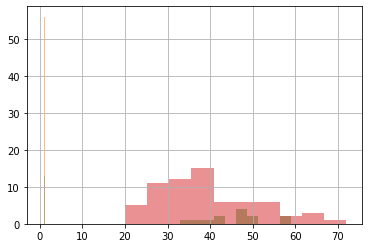

In [9]:
len(hepatitis.loc[hepatitis['Class'] == 2].index), len(hepatitis.loc[hepatitis['Class'] == 1].index)
hepatitis.groupby('Class').SEX.hist(alpha=0.5)
hepatitis.groupby('Class').AGE.hist(alpha=0.5)
hepatitis.describe()

Class
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
4.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Mitoses, dtype: object

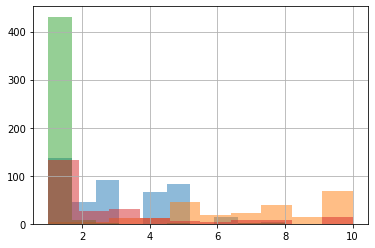

In [11]:
len(breast_cancer.loc[breast_cancer['Class'] == 2].index), len(breast_cancer.loc[breast_cancer['Class'] == 1].index)
breast_cancer.groupby('Class').Clump_Thickness.hist(alpha=0.5)
breast_cancer.groupby('Class').Mitoses.hist(alpha=0.5)

In [16]:
# euclidean distance
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))

# manhattan distance
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:
    def __init__(self, K=1, dist_fn=euclidean):
        """KNN constructor

        :param K int: K value in KNN
        """
        self.K = K
        self.dist_fn = dist_fn

    def fit(self, x, y):
        """Train the model lazily

        Store the training data using this method as it is a           lazy learner.

        :param x: dataset on the x-axis
        :param y: dataset on the y-axis
        """
        self.x = x
        self.y = y
        self.C = np.max(y) + 1

    def predict(self, x_test):
        """Make a prediction for the given data

        Make a prediction using the stored training data and           the test data given as argument
        """
        pass

    def evaluate_acc(true, target):
        pass

In [14]:
class DecisionTree:
    def __init__(self):
        pass

    def fit(self, xdata, ydata, depth):
        pass

    def predict(self, xdata):
        pass

    def evaluate_acc(true, target):
        pass